In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [60]:
#import to pandas
data_file = open("../out.txt")
results = pd.read_csv(data_file,header=None,sep=" ")
names = ["solution_depth","example_no","algorithm","policy","path_length","visited","processed","recursed","time"]
results.columns=names
results.head()

,solution_depth,example_no,algorithm,policy,path_length,visited,processed,recursed,time
0,1,1,astr,hamm,1,2,1,1,0.0
1,1,1,astr,manh,1,2,1,1,0.0
2,1,1,bfs,drlu,1,0,1,1,0.0
3,1,1,bfs,drul,1,0,1,1,0.0
4,1,1,bfs,ludr,1,2,1,1,0.0


In [61]:
def get_color_iter(lenght):
    return iter(cm.Dark2(np.linspace(0, 1, lenght)))

In [62]:
column_chart_name={
    "visited":"Średnia ilość odwiedzonych stanów",
    "path_length":"Średnia długość rozwiązania",
    "processed":"Średnia ilość przetworzonych stanów",
    "recursed":"Średnia maksymalna głębokość rekursji",
    "time":"Średnia czas przetwarzania [s]"
}

In [63]:
def resultAlgFromStr(alg_name):
    return results[results.algorithm == str(alg_name)]

In [64]:
def avg(name,data_label):
    data = resultAlgFromStr(name)
    avgs=[]
    max_solution_depth = max(results.solution_depth)
    for sol_depth in range(1,max_solution_depth+1):
        current_solution = data[data.solution_depth==sol_depth]
        avgs.append(np.average(current_solution[data_label]))
    return avgs

In [65]:
def plotThreeAlgs(series_name):
    width = 0.25
    bfs_avg = avg("bfs",series_name)
    dfs_avg = avg("dfs",series_name)
    astr_avg = avg("astr",series_name)

    max_solution_depth = max(results.solution_depth)
    pos = np.arange(max_solution_depth)+1
    colors= get_color_iter(2)
    plt.bar(pos-(width*1.5),bfs_avg,width,label="bfs", color = next(colors),align="edge")
    plt.bar(pos,dfs_avg,width,label="dfs", color = "lime")
    plt.bar(pos+width*0.5,bfs_avg,width,label="astr", color = next(colors),align="edge")
    plt.minorticks_on()
    plt.grid(True,which="major",axis="y",ls="--", color="black")
    plt.legend(title="ALgorytm:")
    plt.xlabel("Głębokość rozwiązania")

In [66]:
def plot_all_algs(series_name,ycale="log"):
    plotThreeAlgs(series_name)
    plt.ylabel(column_chart_name[series_name])
    plt.title("Wszystkie algorytmy: "+ column_chart_name[series_name])
    plt.yscale(ycale)
    plt.savefig("ALL_"+series_name)
    plt.show()

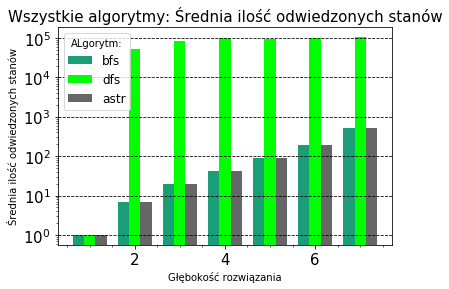

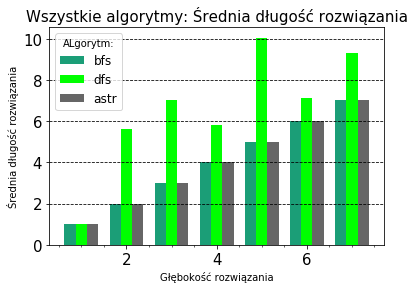

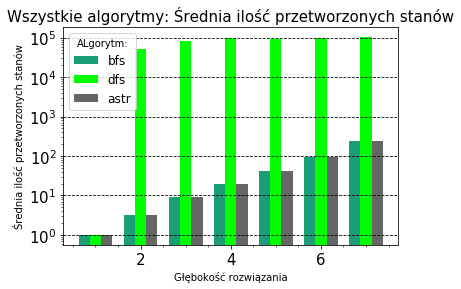

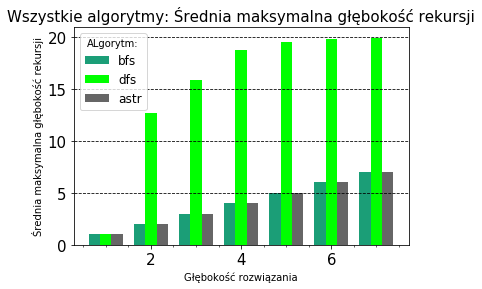

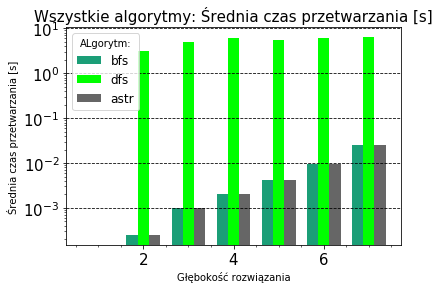

In [67]:
plot_all_algs("visited")
plot_all_algs("path_length","linear")
plot_all_algs("processed")
plot_all_algs("recursed","linear")
plot_all_algs("time")

In [68]:
overview = results.groupby(["algorithm","solution_depth"]).mean()
overview

example_no  path_length        visited  \
algorithm solution_depth                                           
astr      1                      1.5     1.000000       2.000000   
          2                      2.5     2.000000       5.000000   
          3                      5.5     3.000000       8.000000   
          4                     12.5     4.000000      11.000000   
          5                     27.5     5.000000      16.916667   
          6                     54.0     6.037383      35.158879   
          7                    106.5     7.433962     147.695755   
bfs       1                      1.5     1.000000       1.000000   
          2                      2.5     2.000000       7.000000   
          3                      5.5     3.000000      19.300000   
          4                     12.5     4.000000      42.250000   
          5                     27.5     5.000000      88.166667   
          6                     54.0     6.000000     196.518692   
          7                    106.5     7.014151     504.645047   
dfs       1                      1.5     1.000000       1.000000   
          2                      2.5     5.625000   51621.250000   
          3                      5.5     7.050000   83742.300000   
          4                     12.5     5.802083  101008.854167   
          5                     27.5    10.055556   93960.106481   
          6                     54.0     7.114486  102112.112150   
          7                    106.5     9.308962  104901.188679   

                              processed   recursed      time  
algorithm solution_depth                                      
astr      1                    1.000000   1.000000  0.000000  
          2                    2.250000   2.000000  0.000000  
          3                    3.500000   3.050000  0.000300  
          4                    4.770833   4.000000  0.000833  
          5                    7.768519   5.166667  0.001167  
          6                   18.163551   6.462617  0.002009  
          7                   85.198113   8.533019  0.008349  
bfs       1                    1.000000   1.000000  0.000000  
          2                    3.250000   2.000000  0.000250  
          3                    8.900000   3.000000  0.001013  
          4                   19.750000   4.000000  0.002057  
          5                   41.166667   5.000000  0.004222  
          6                   93.037383   6.018692  0.009577  
          7                  240.912736   7.033019  0.025637  
dfs       1                    1.000000   1.000000  0.000000  
          2                50750.625000  12.625000  3.121500  
          3                82301.575000  15.825000  5.065862  
          4                99286.010417  18.708333  6.102214  
          5                92356.000000  19.458333  5.658734  
          6               100372.514019  19.799065  6.161717  
          7               103107.648585  19.910377  6.356159

In [69]:
overview2 = results.groupby(["solution_depth","algorithm"],as_index=False).mean()
overview2

,solution_depth,algorithm,example_no,path_length,visited,processed,recursed,time
0,1,astr,1.5,1.000000,2.000000,1.000000,1.000000,0.000000
1,1,bfs,1.5,1.000000,1.000000,1.000000,1.000000,0.000000
2,1,dfs,1.5,1.000000,1.000000,1.000000,1.000000,0.000000
3,2,astr,2.5,2.000000,5.000000,2.250000,2.000000,0.000000
4,2,bfs,2.5,2.000000,7.000000,3.250000,2.000000,0.000250
5,2,dfs,2.5,5.625000,51621.250000,50750.625000,12.625000,3.121500
6,3,astr,5.5,3.000000,8.000000,3.500000,3.050000,0.000300
7,3,bfs,5.5,3.000000,19.300000,8.900000,3.000000,0.001013
8,3,dfs,5.5,7.050000,83742.300000,82301.575000,15.825000,5.065862
9,4,astr,12.5,4.000000,11.000000,4.770833,4.000000,0.000833


In [70]:
bad_bfs = results[(results.solution_depth!=results.path_length)]
bad_bfs[bad_bfs.algorithm=="bfs"]

,solution_depth,example_no,algorithm,policy,path_length,visited,processed,recursed,time
5420,7,101,bfs,drlu,13,32320,15782,13,1.817
5424,7,101,bfs,rdlu,13,32238,15741,13,1.831
6591,7,166,bfs,drul,13,32238,15741,13,1.785
6595,7,166,bfs,rdul,13,32320,15782,13,1.900


In [71]:
overview3 = results.groupby(["algorithm","solution_depth","policy"],as_index=False).mean()
overview3.head()

,algorithm,solution_depth,policy,example_no,path_length,visited,processed,recursed,time
0,astr,1,hamm,1.5,1.0,2.0,1.0,1.0,0.0
1,astr,1,manh,1.5,1.0,2.0,1.0,1.0,0.0
2,astr,2,hamm,2.5,2.0,4.5,2.0,2.0,0.0
3,astr,2,manh,2.5,2.0,5.5,2.5,2.0,0.0
4,astr,3,hamm,5.5,3.0,7.0,3.0,3.0,0.0


In [72]:
    astr = overview3[overview3.algorithm=="astr"]
    astr = astr.drop(["example_no"],axis = 1)
    hamm= astr[astr.policy=="hamm"]
    manh = astr[astr.policy=="manh"]
    manh

,algorithm,solution_depth,policy,path_length,visited,processed,recursed,time
1,astr,1,manh,1.000000,2.000000,1.000000,1.000000,0.000000
3,astr,2,manh,2.000000,5.500000,2.500000,2.000000,0.000000
5,astr,3,manh,3.000000,9.000000,4.000000,3.100000,0.000600
7,astr,4,manh,4.000000,12.333333,5.500000,4.000000,0.001000
9,astr,5,manh,5.000000,21.777778,10.388889,5.333333,0.001389
11,astr,6,manh,6.037383,24.841121,11.831776,6.345794,0.001393
13,astr,7,manh,7.188679,34.867925,16.792453,7.745283,0.001934


In [73]:
def a_str_plot_series(series):
    width = 0.3
    colors= get_color_iter(2)
    plt.bar(manh.solution_depth-width/2,manh[series],width, label = "manhatan",color = next(colors))
    plt.bar(hamm.solution_depth+width/2,hamm[series],width, label = "hamminga", color = next(colors))
    plt.xlabel("Głębokość rozwiązania")
    plt.minorticks_on()
    plt.grid(True,which="major",axis="y",ls="--", color="black")
    plt.grid(True,which="minor",axis="y",ls="--")
    plt.legend(title="Metryki:")

In [74]:
def astr_plot(series_name,yscale="linear"):
    a_str_plot_series(series_name)
    plt.yscale(yscale)
    plt.ylabel(column_chart_name[series_name])
    plt.title("A*:"+column_chart_name[series_name])
    plt.savefig("ASTR_"+series_name)
    plt.show()

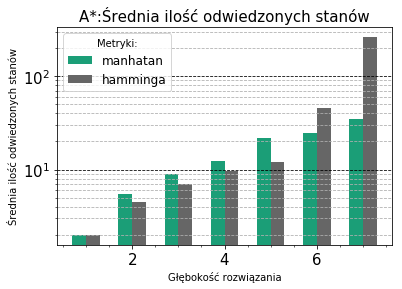

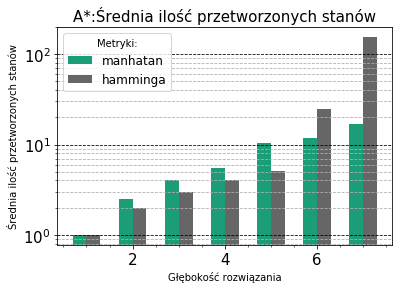

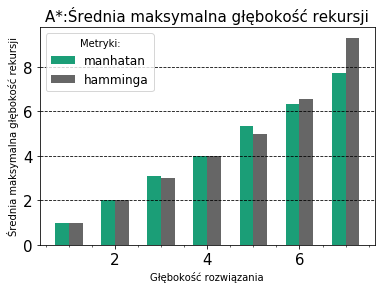

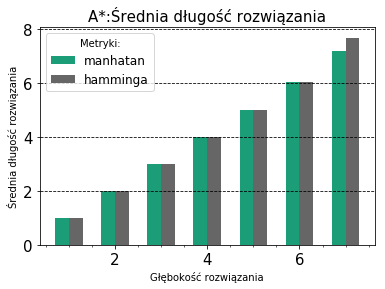

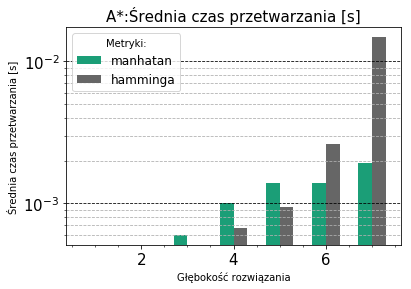

In [75]:
astr_plot("visited","log")
astr_plot("processed","log")
astr_plot("recursed")
astr_plot("path_length")
astr_plot("time","log")


In [87]:
def plot_multi_bar(df, series, ylabel, yscale="log"):
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)
    plt.rc('legend', fontsize=12)
    plt.rc('axes', titlesize=15)
    
    fig = plt.figure(figsize=(18,5),dpi=400)
    ax1 = fig.add_subplot(111)

    bar_x_tick = []
    bar_x_label =[]
    bar_width = 0.1
    
    policies = list(set(df.policy))
    policy_len = len(policies)
    
    bar_number = policy_len
    start_x = np.arange(1,policy_len)-(bar_number*bar_width)/2
    colors = get_color_iter(policy_len)
    
    for no,pol in enumerate(policies):
        data = df[df.policy==pol]
        bar_pos = start_x+no*bar_width
        bar_x_tick.extend(bar_pos)
        bar_x_label.extend([pol]*7)
        ax1.bar(bar_pos,
                data[series],
                bar_width,
                align="edge",
                label = pol,
                color=next(colors))

    ax1.set_xlabel("Porządki przechodzenia")
    ax1.grid(True)

    ax2 = ax1.twiny()
    ax2.set_xlabel("Głębokość rozwiązania")
    ax1.set_ylabel(ylabel)

    ax2.set_xticks(range(0,8))
    ax2.set_xbound(ax1.get_xbound())
    ax1.set_xticks(bar_x_tick)

    ax1.set_xticklabels(bar_x_label, rotation='vertical')
    ax1.set_yscale(yscale)
    ax1.legend(title="Porządki:")

In [88]:
bfs = overview3[overview3.algorithm=="bfs"]
dfs = overview3[overview3.algorithm=="dfs"]

In [89]:
def plot_dfs(data_series,yscale="log"): 
    plot_multi_bar(dfs,data_series,column_chart_name[data_series],yscale)
    plt.title("DFS:"+column_chart_name[data_series])
    plt.savefig("DFS_"+data_series, bbox_inches='tight')
    plt.show()

In [90]:
def plot_bfs(data_series,yscale="log"): 
    plot_multi_bar(bfs,data_series,column_chart_name[data_series],yscale)
    plt.title("BFS:"+column_chart_name[data_series])
    plt.savefig("BFS_"+data_series, bbox_inches='tight')
    plt.show()

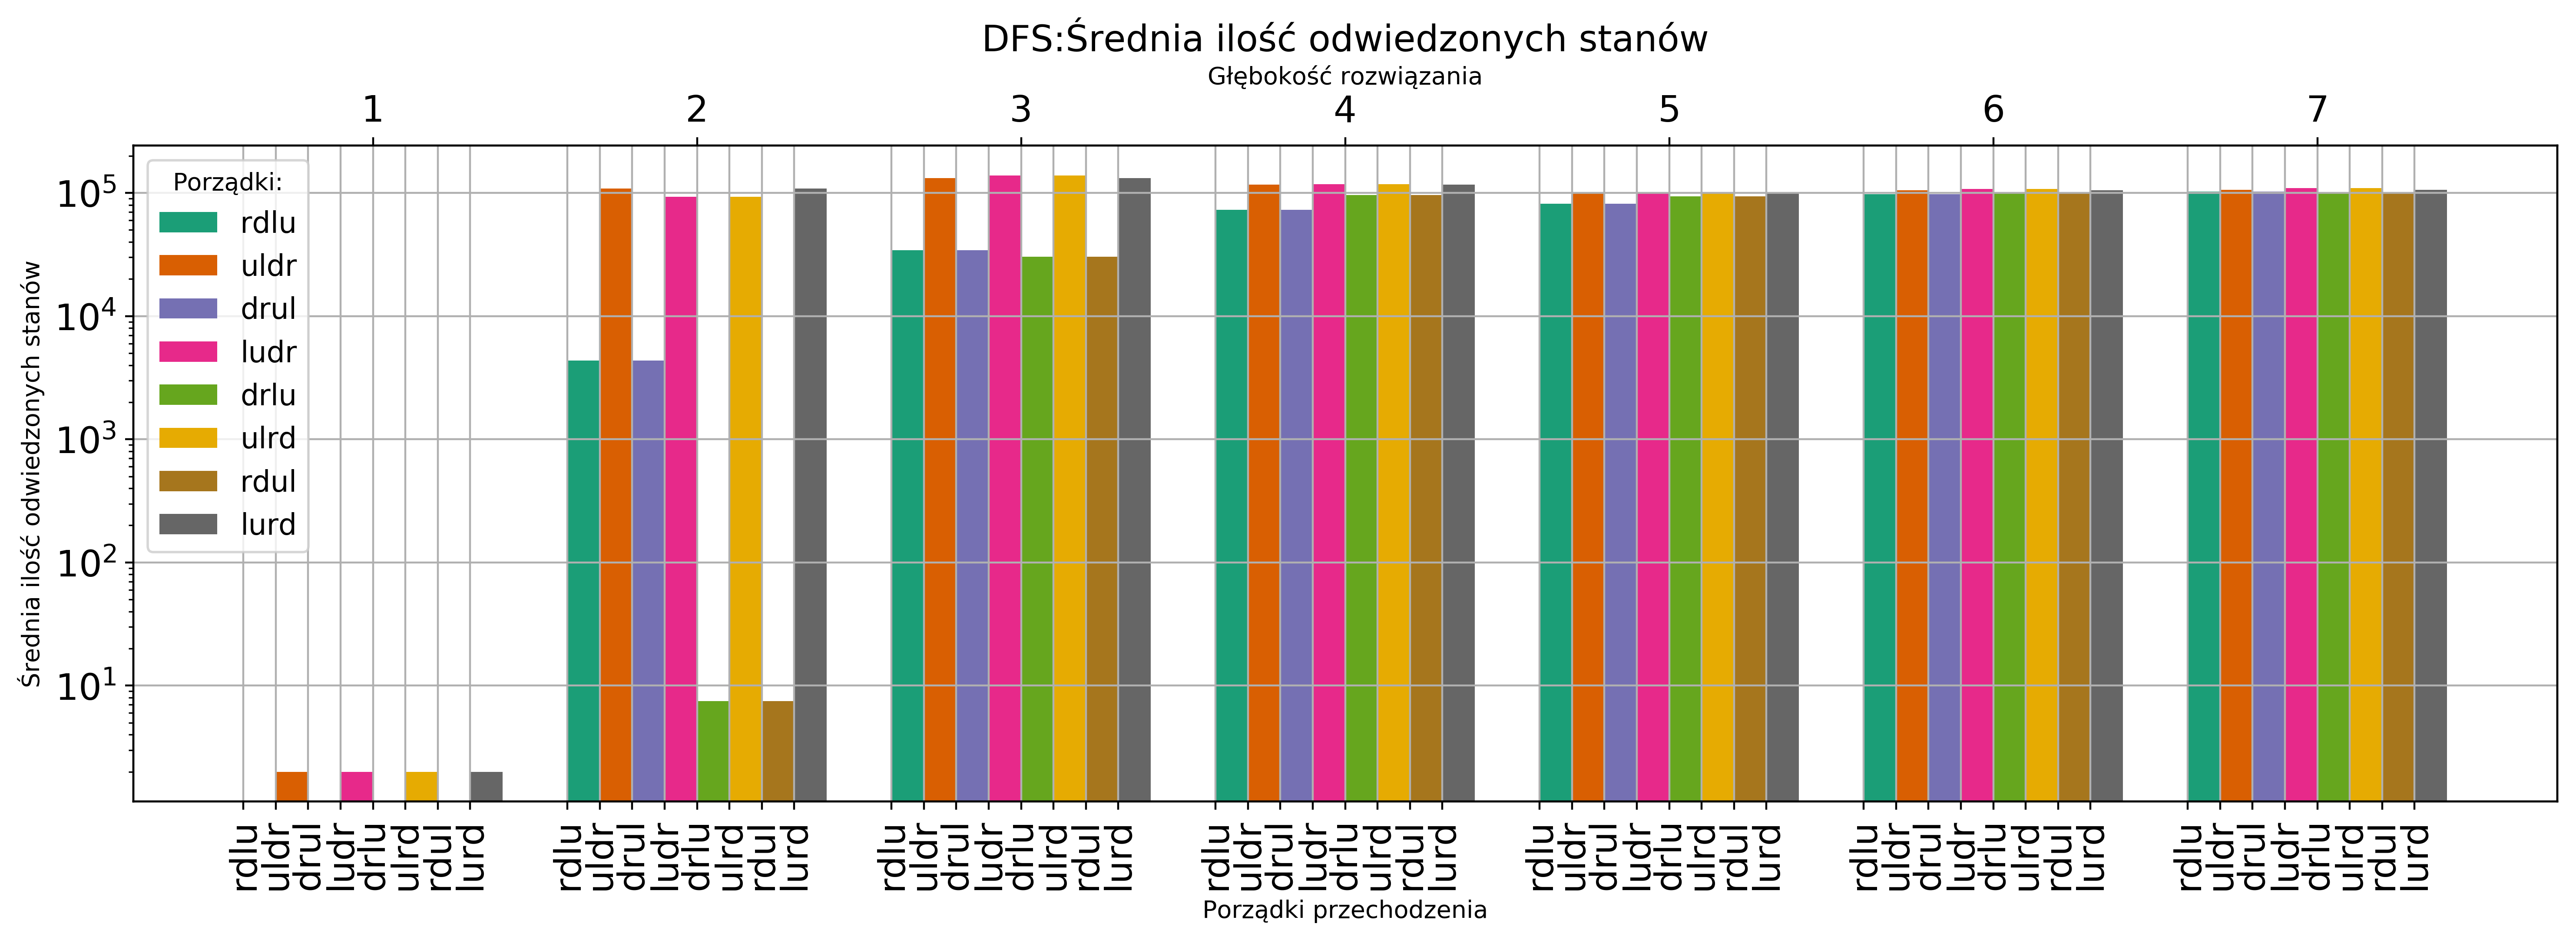

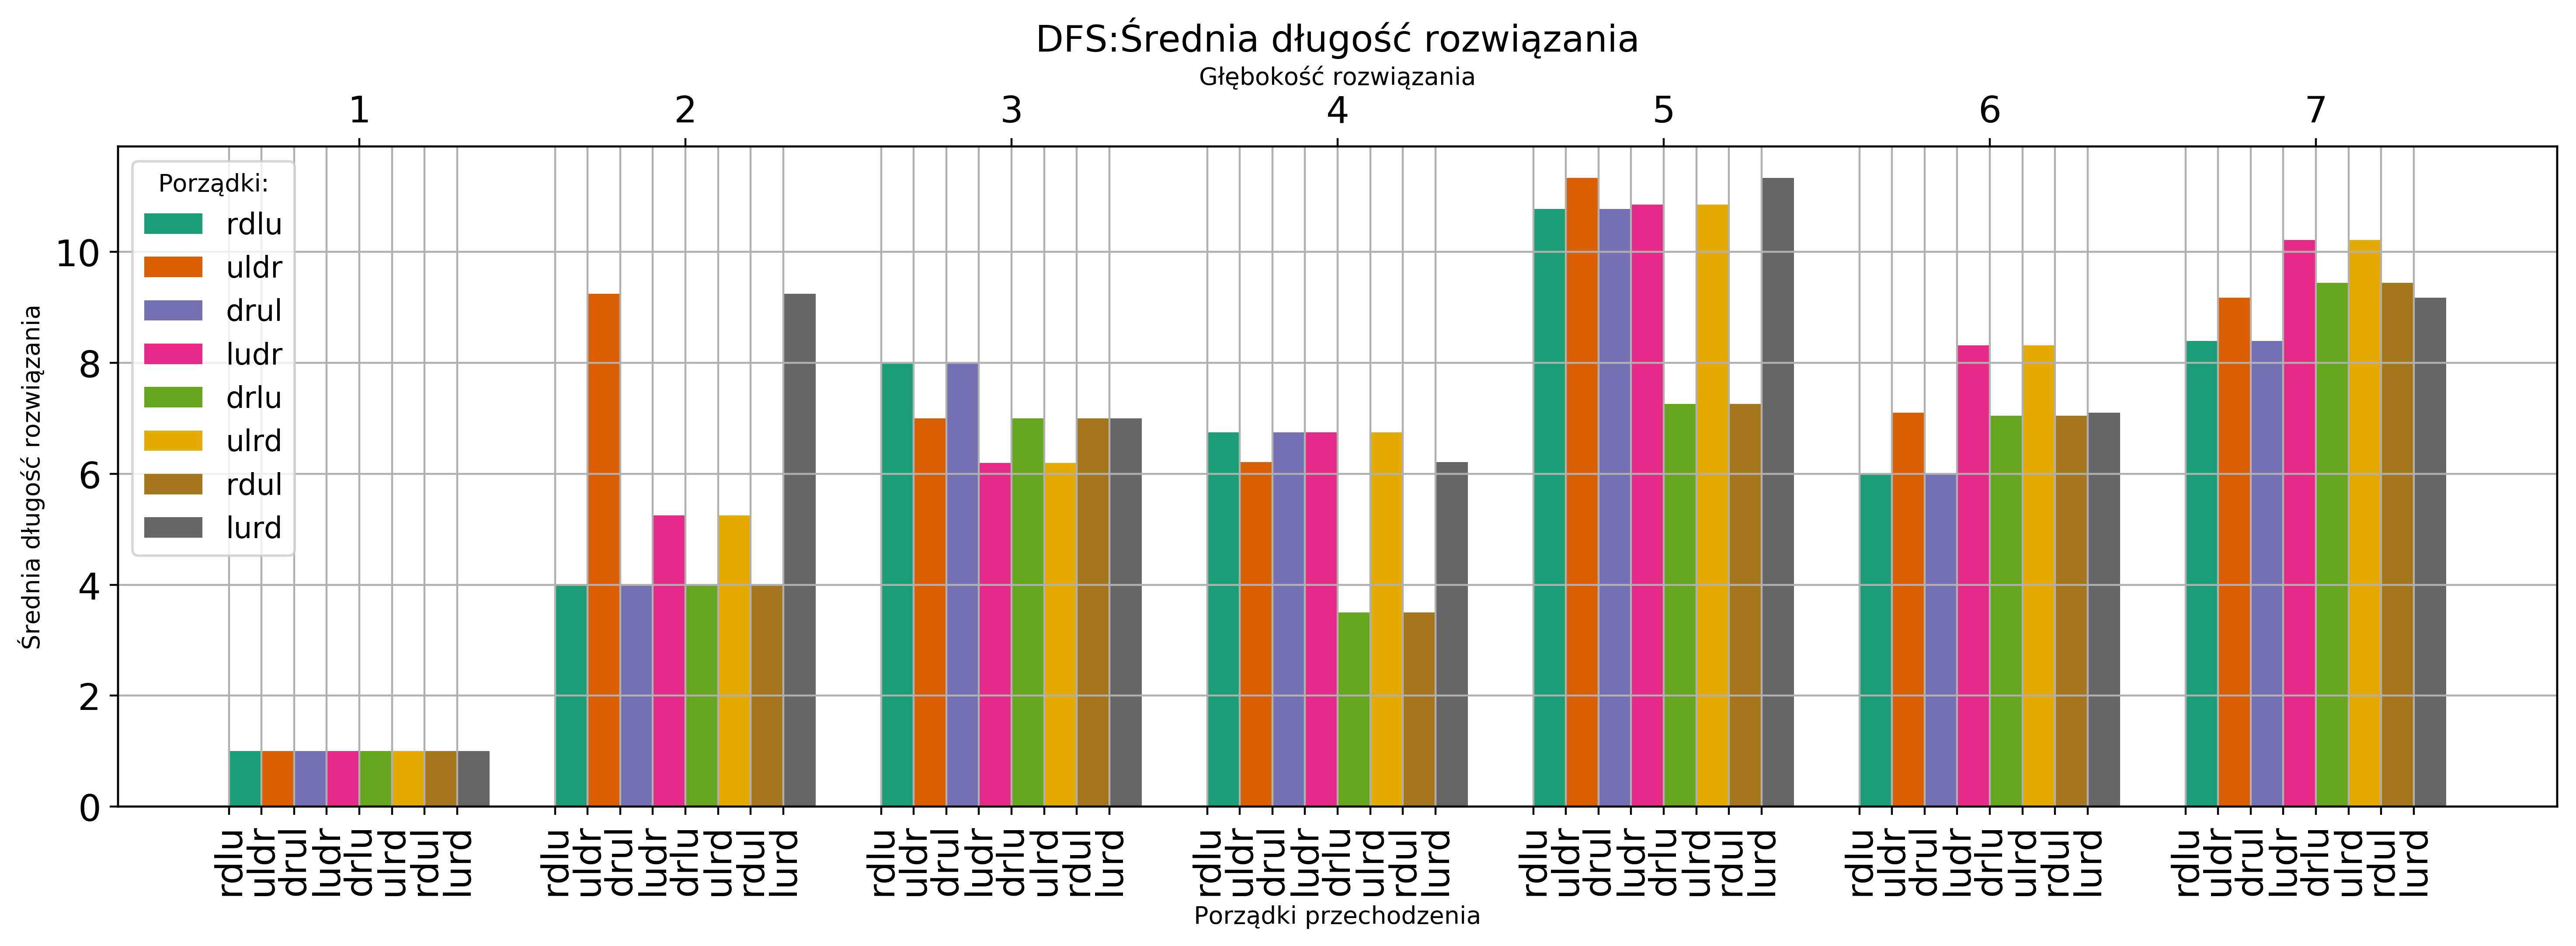

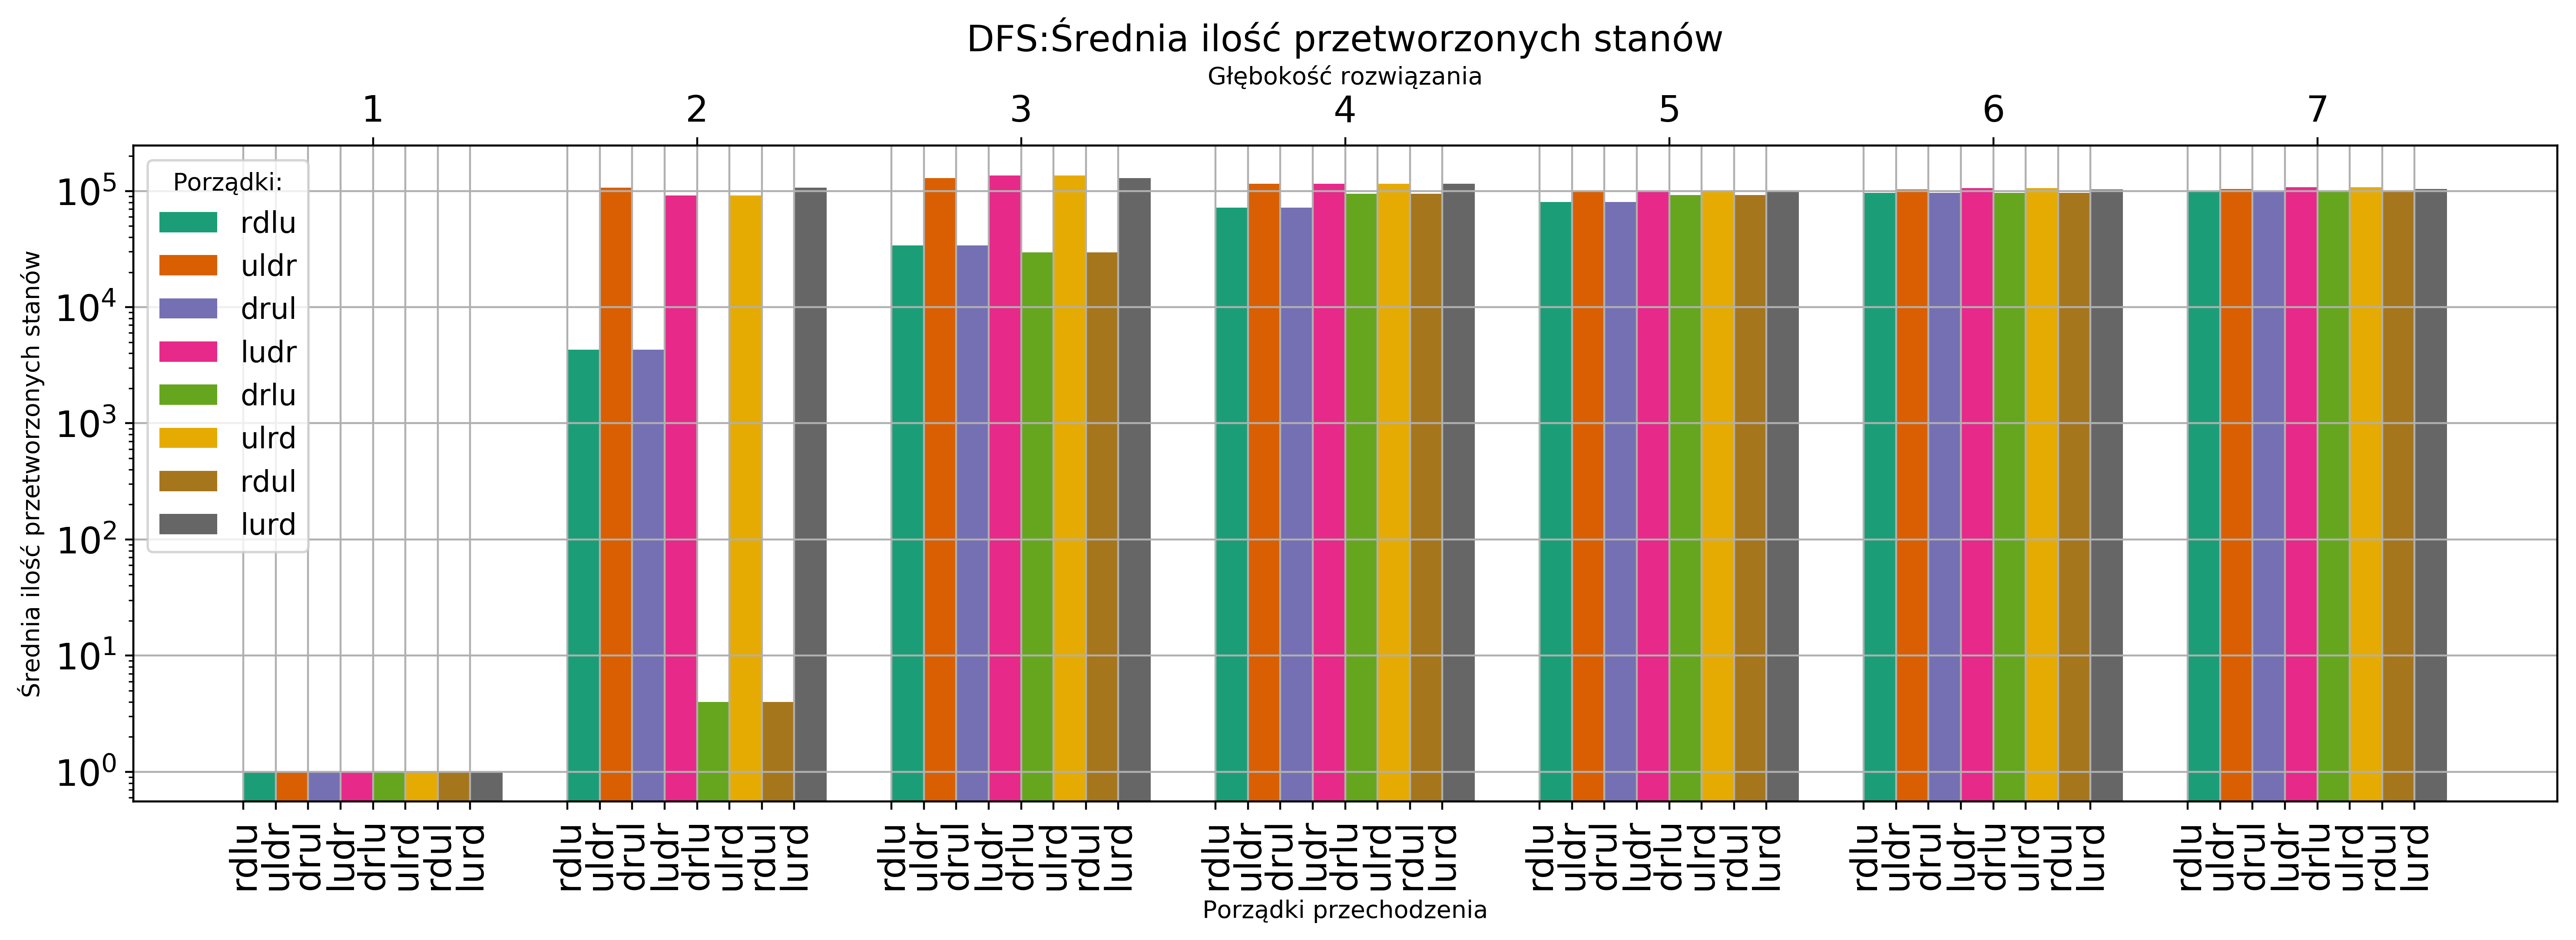

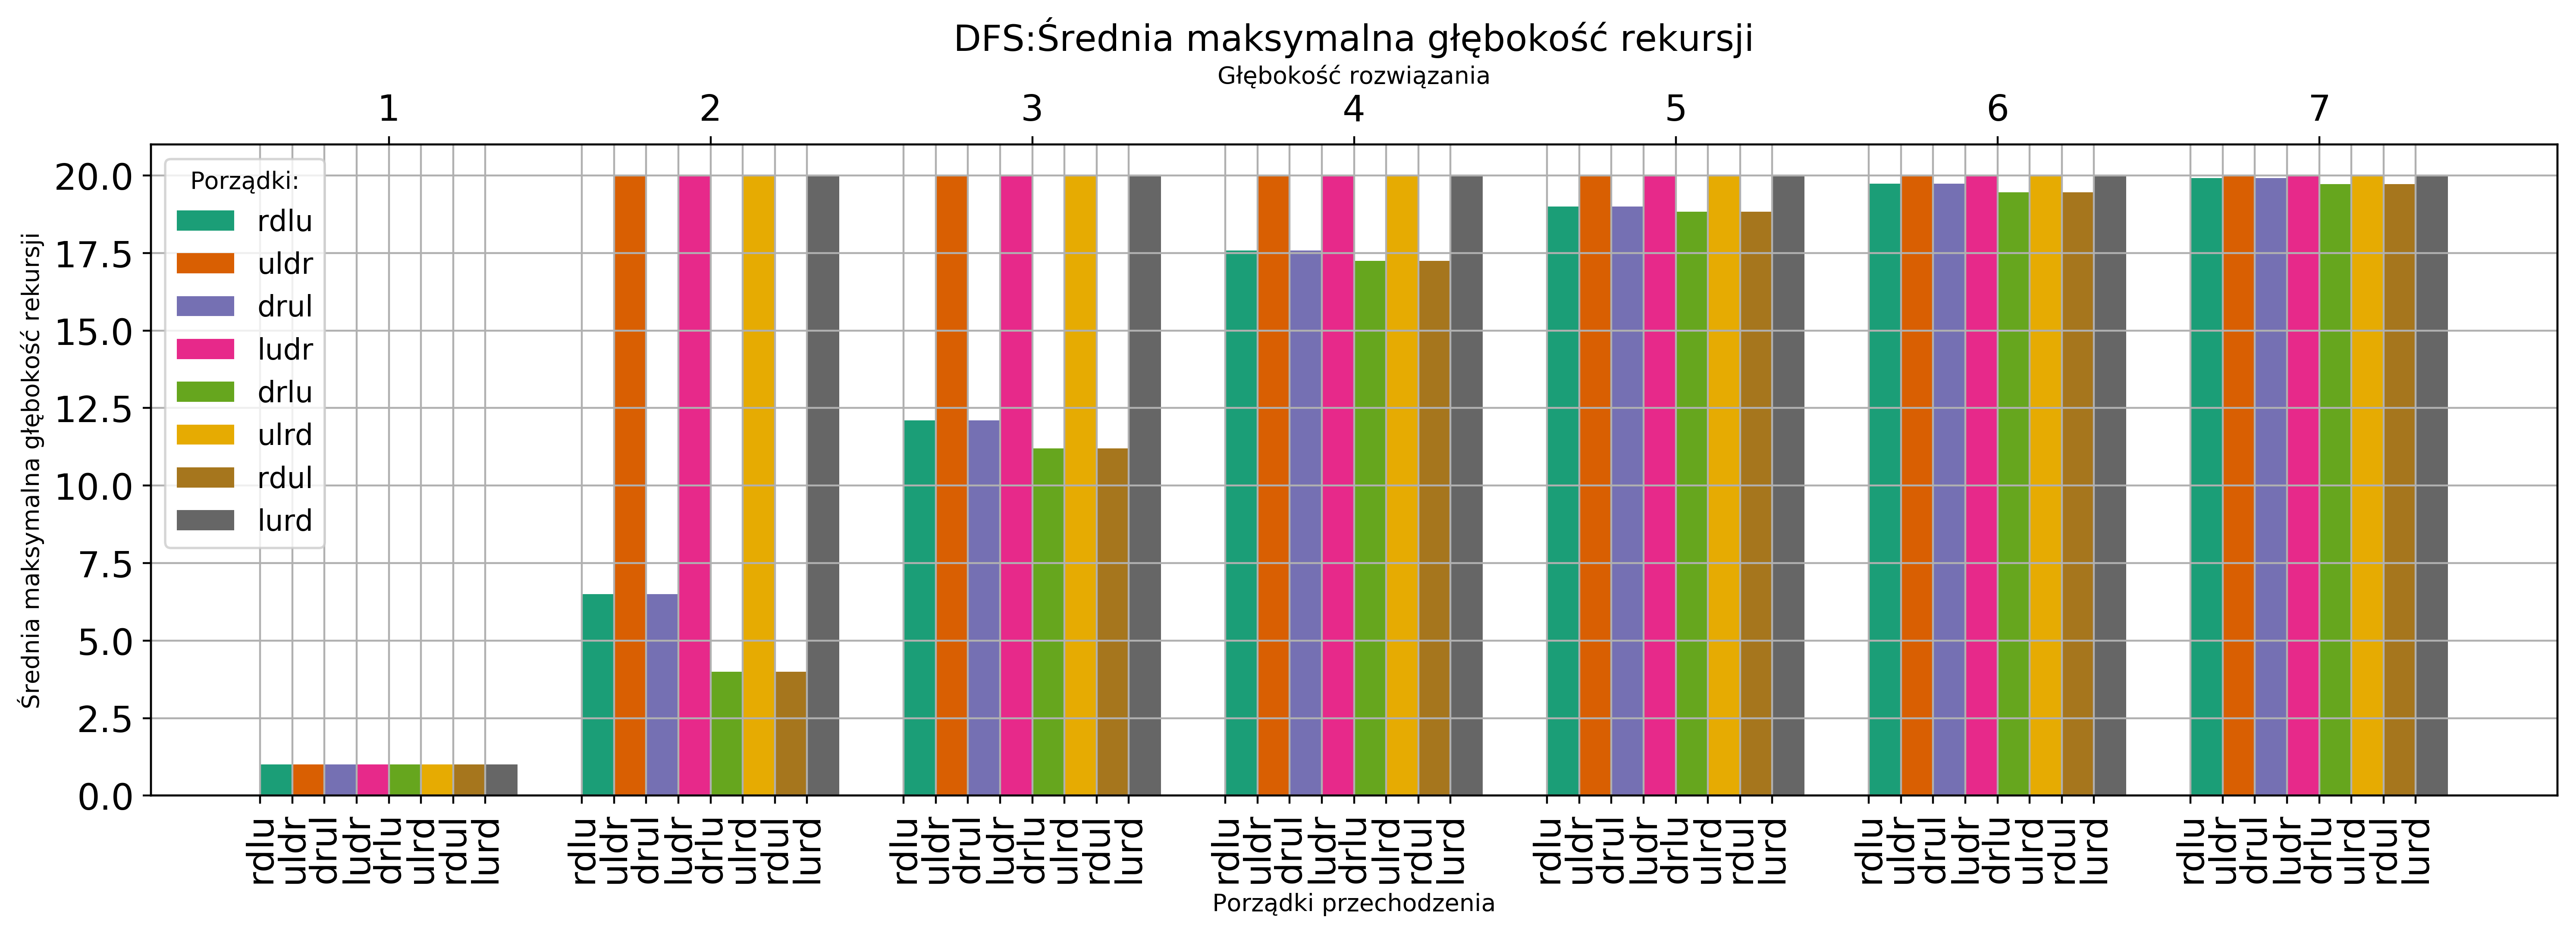

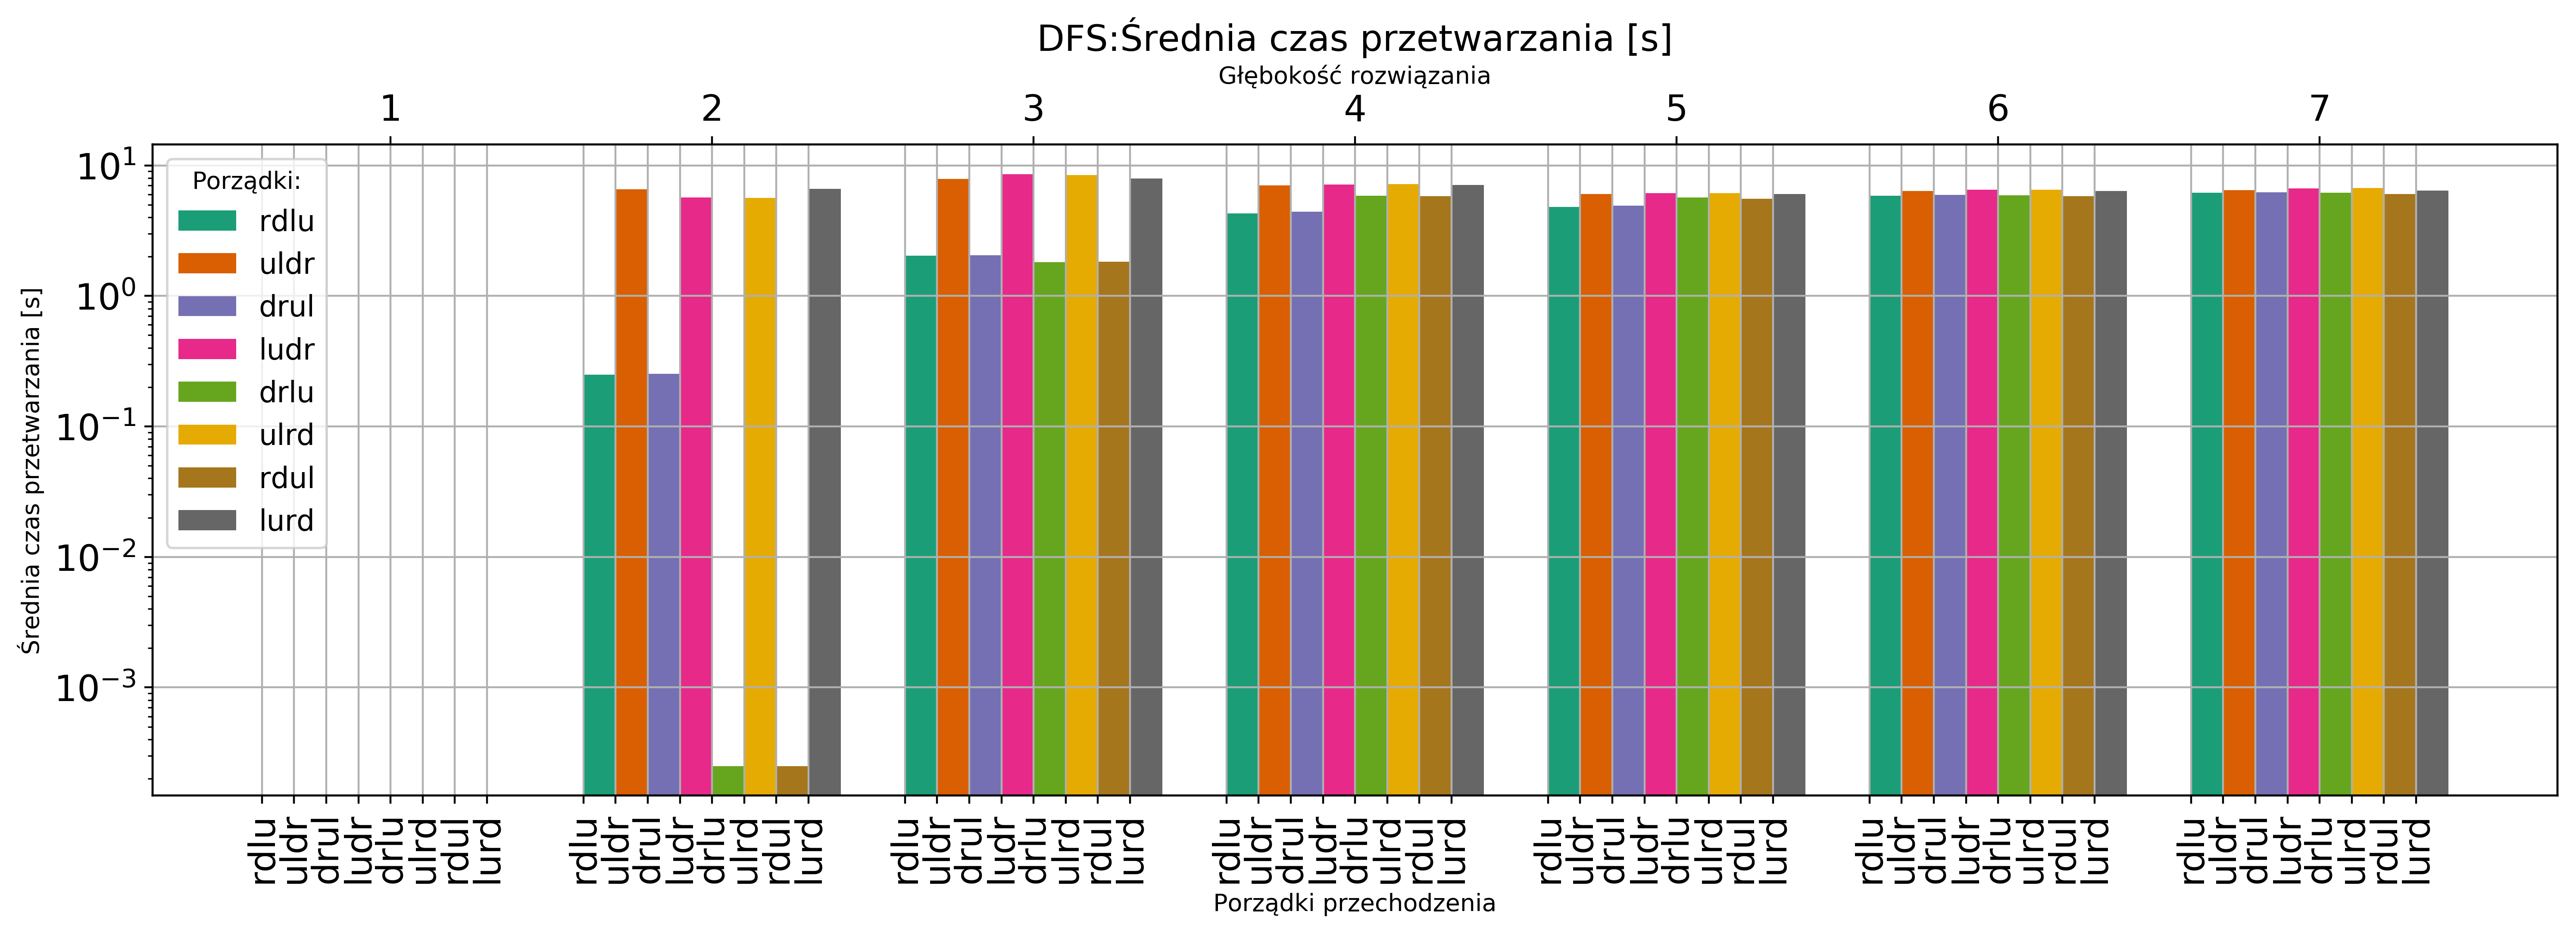

In [91]:
plot_dfs("visited")
plot_dfs("path_length","linear")
plot_dfs("processed")
plot_dfs("recursed","linear")
plot_dfs("time")

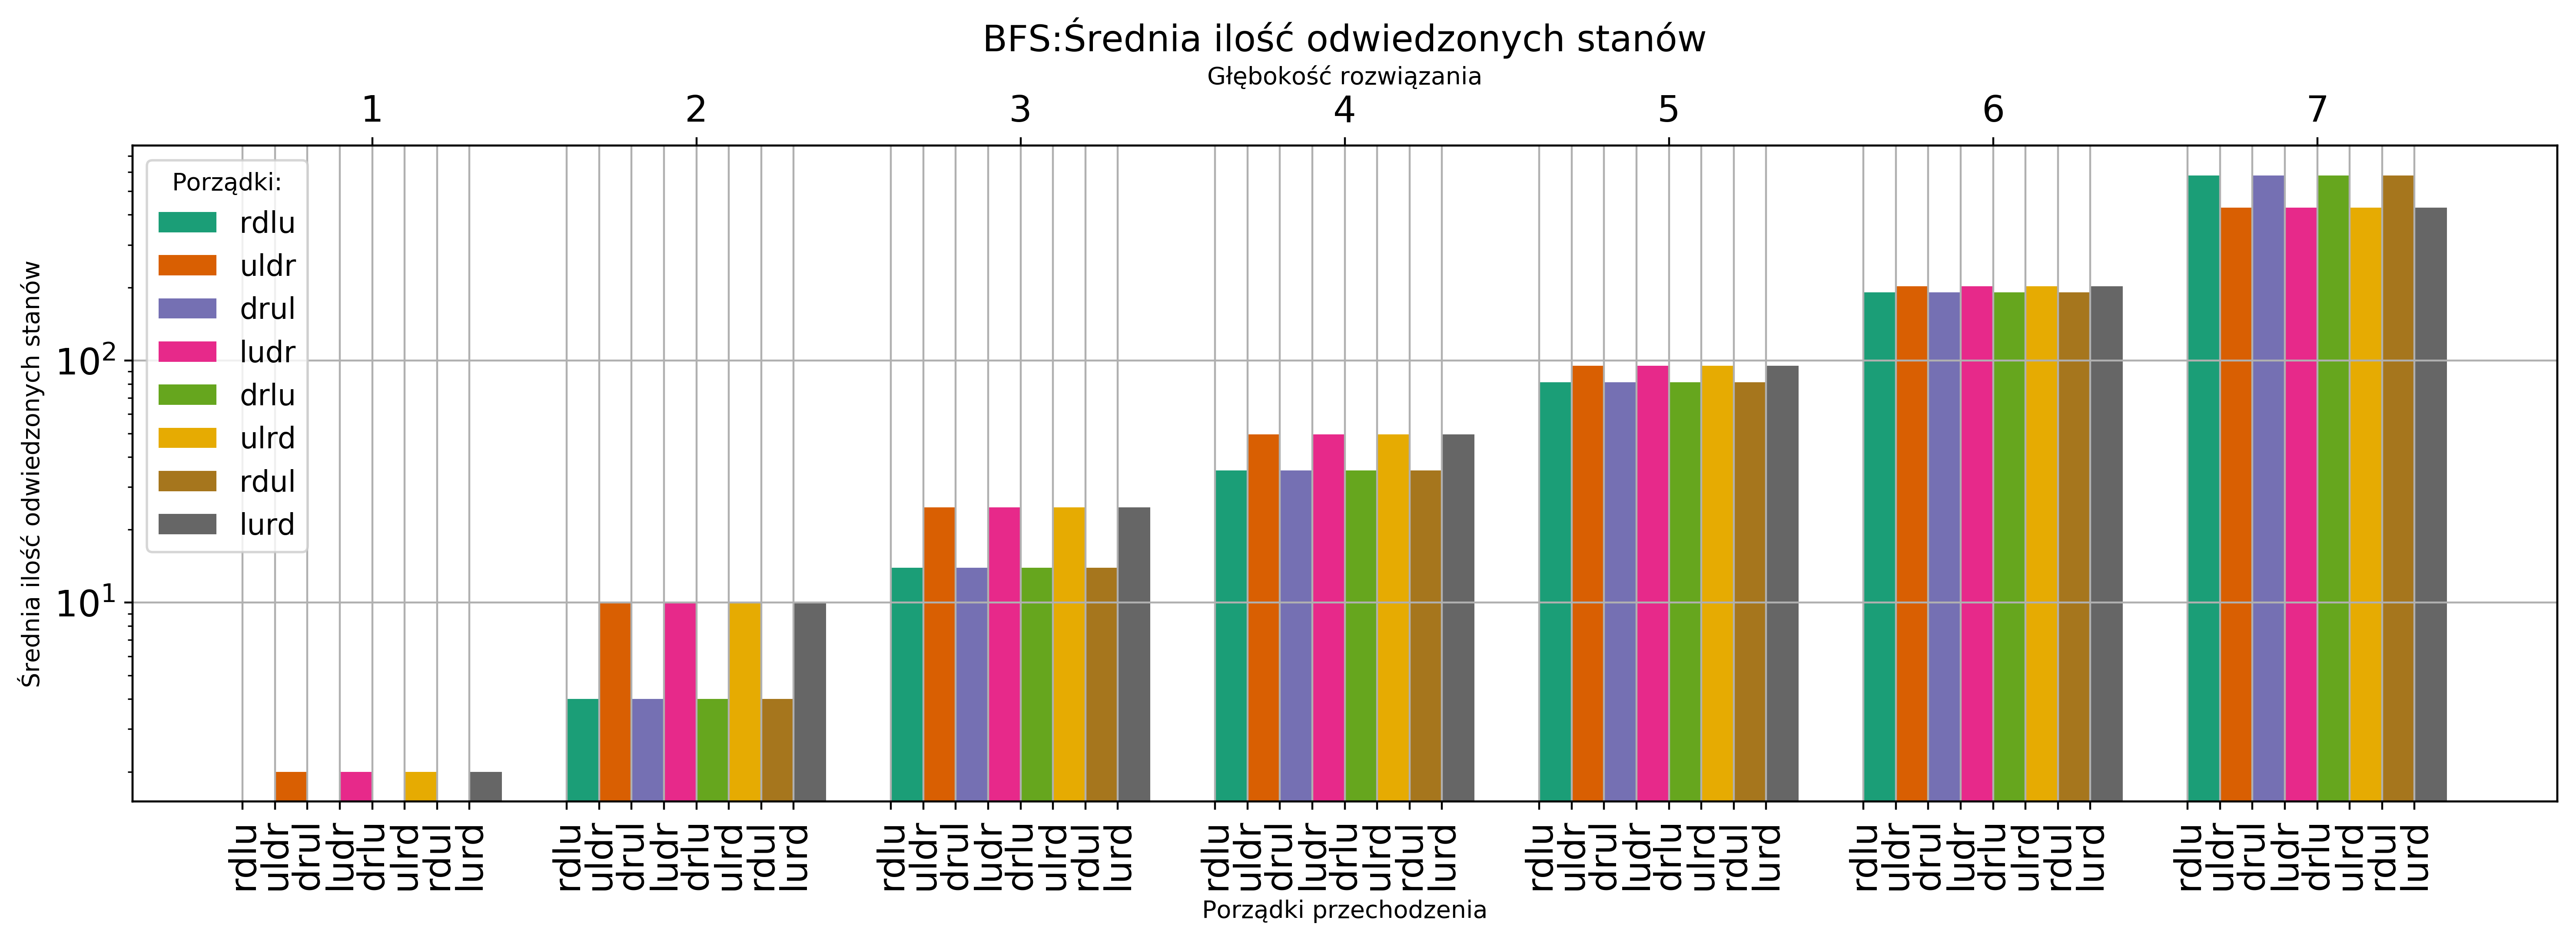

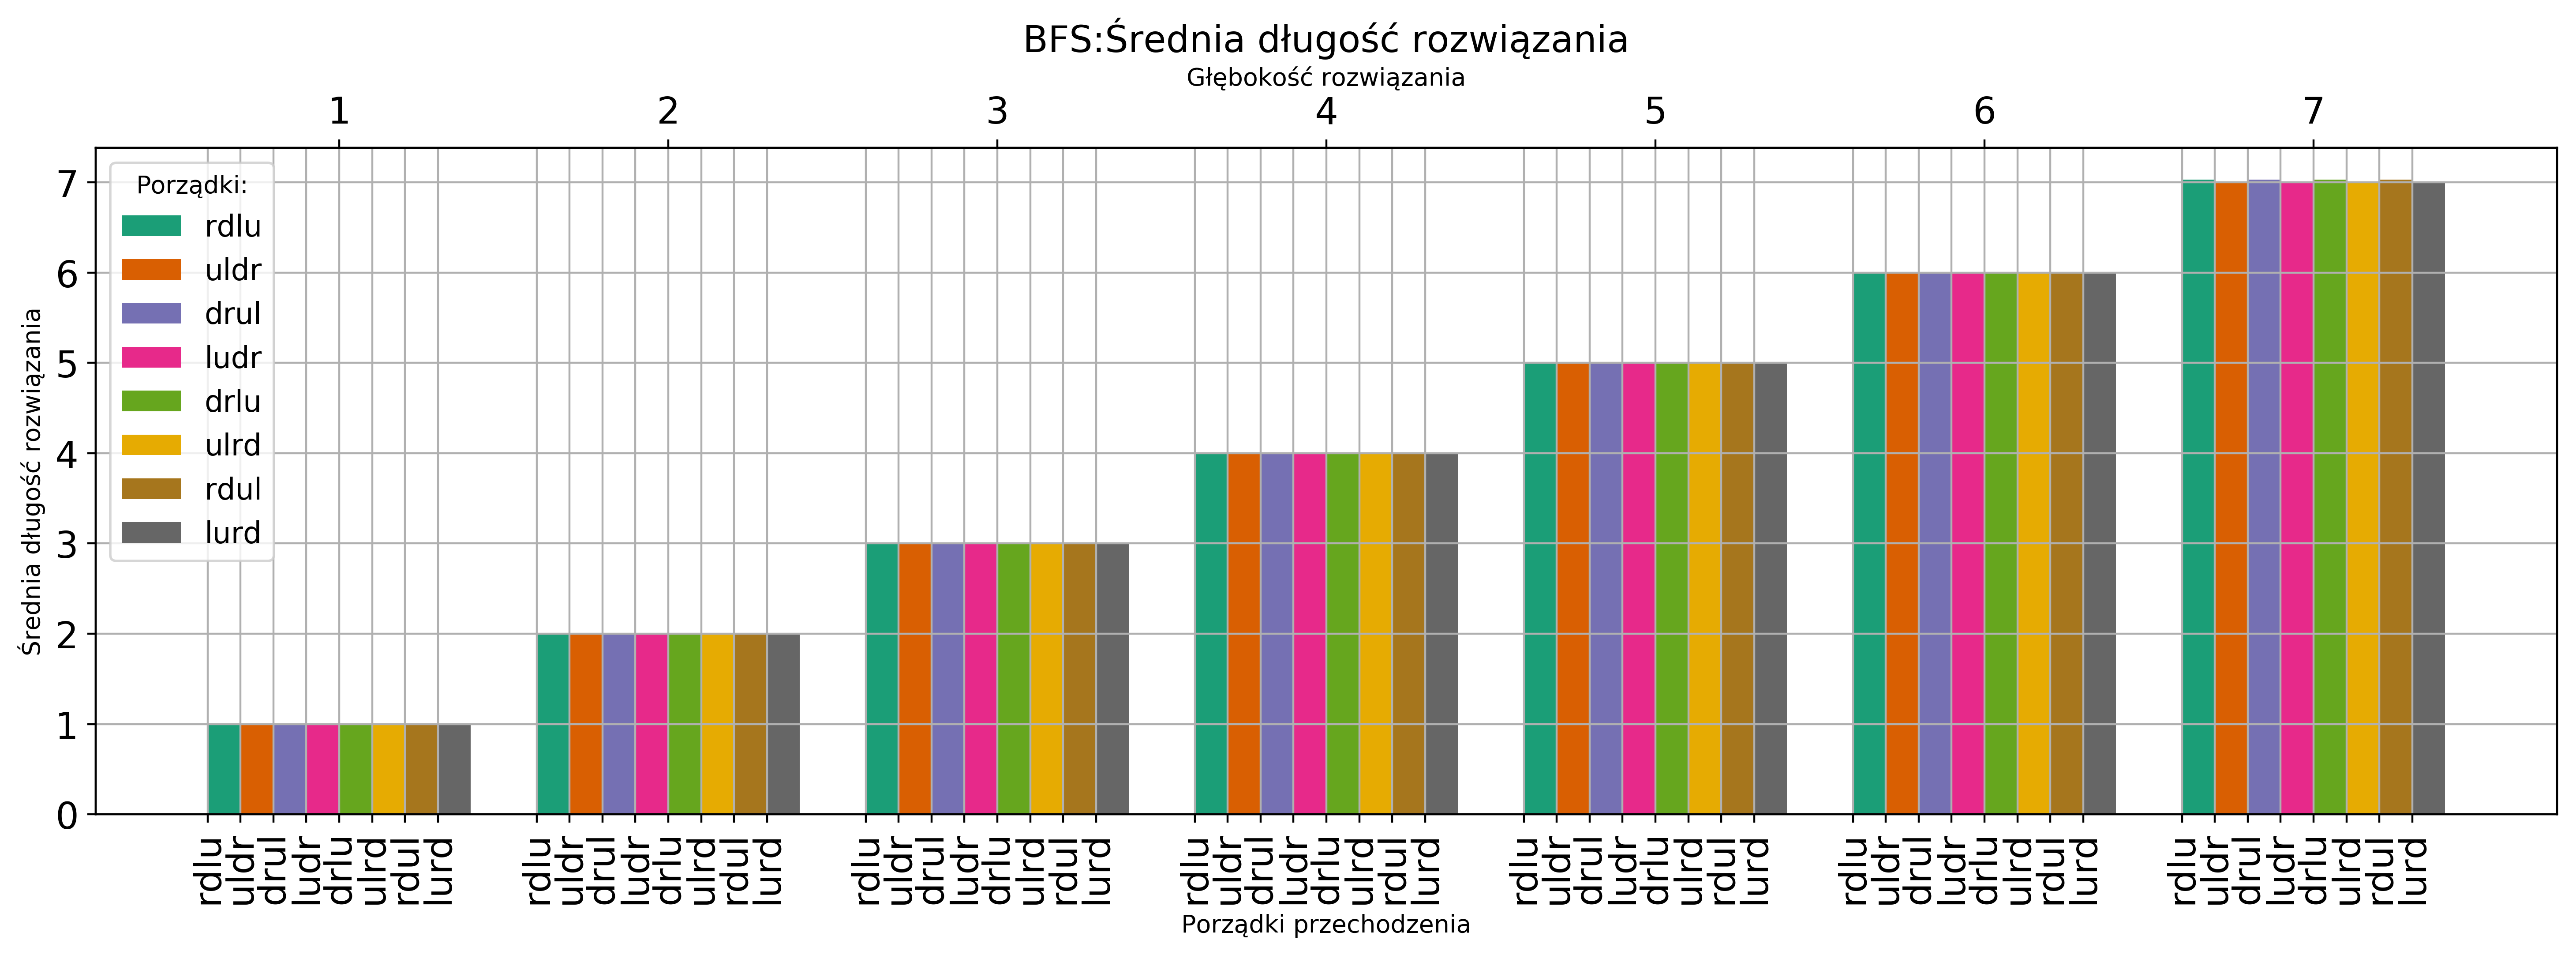

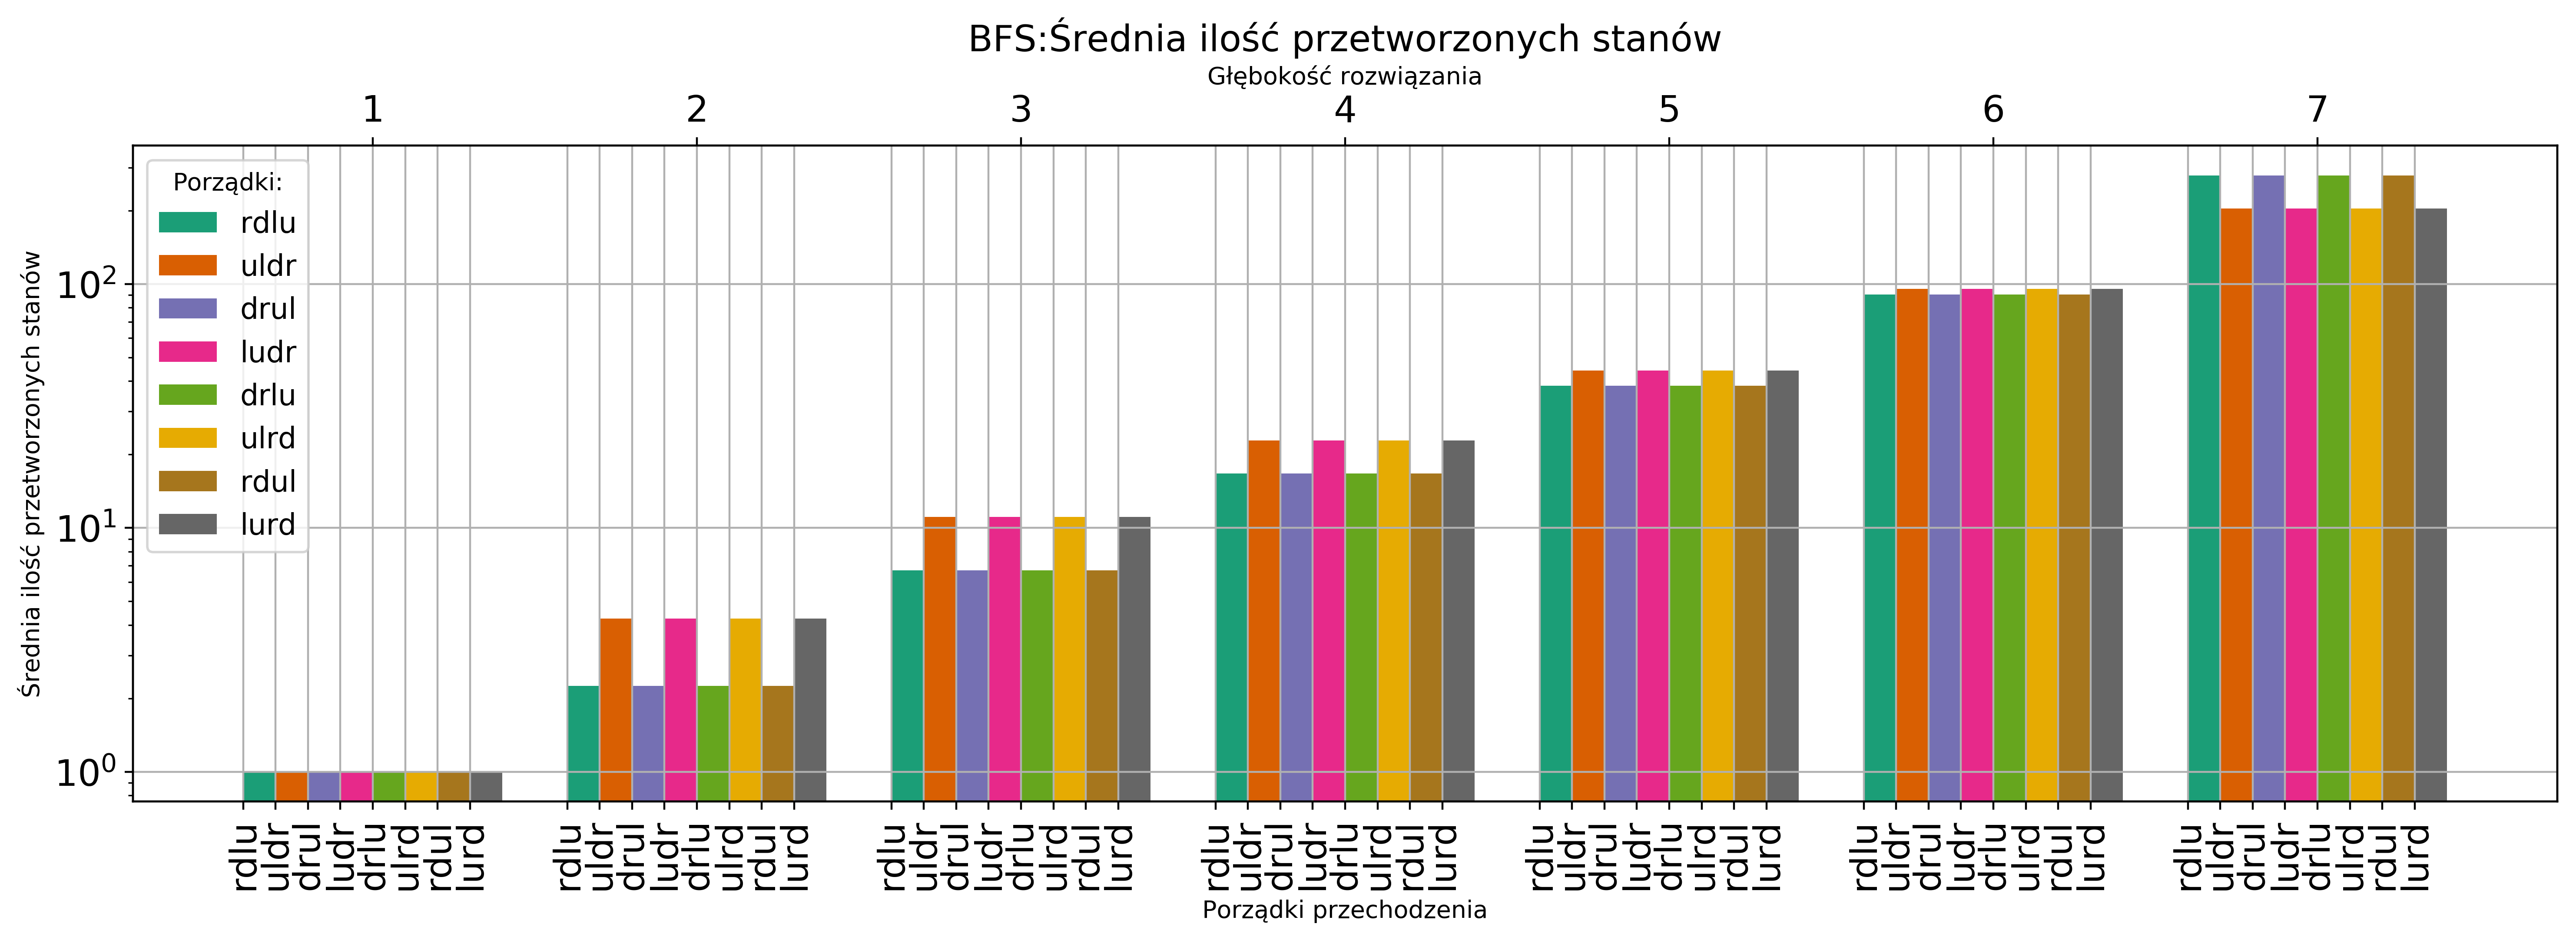

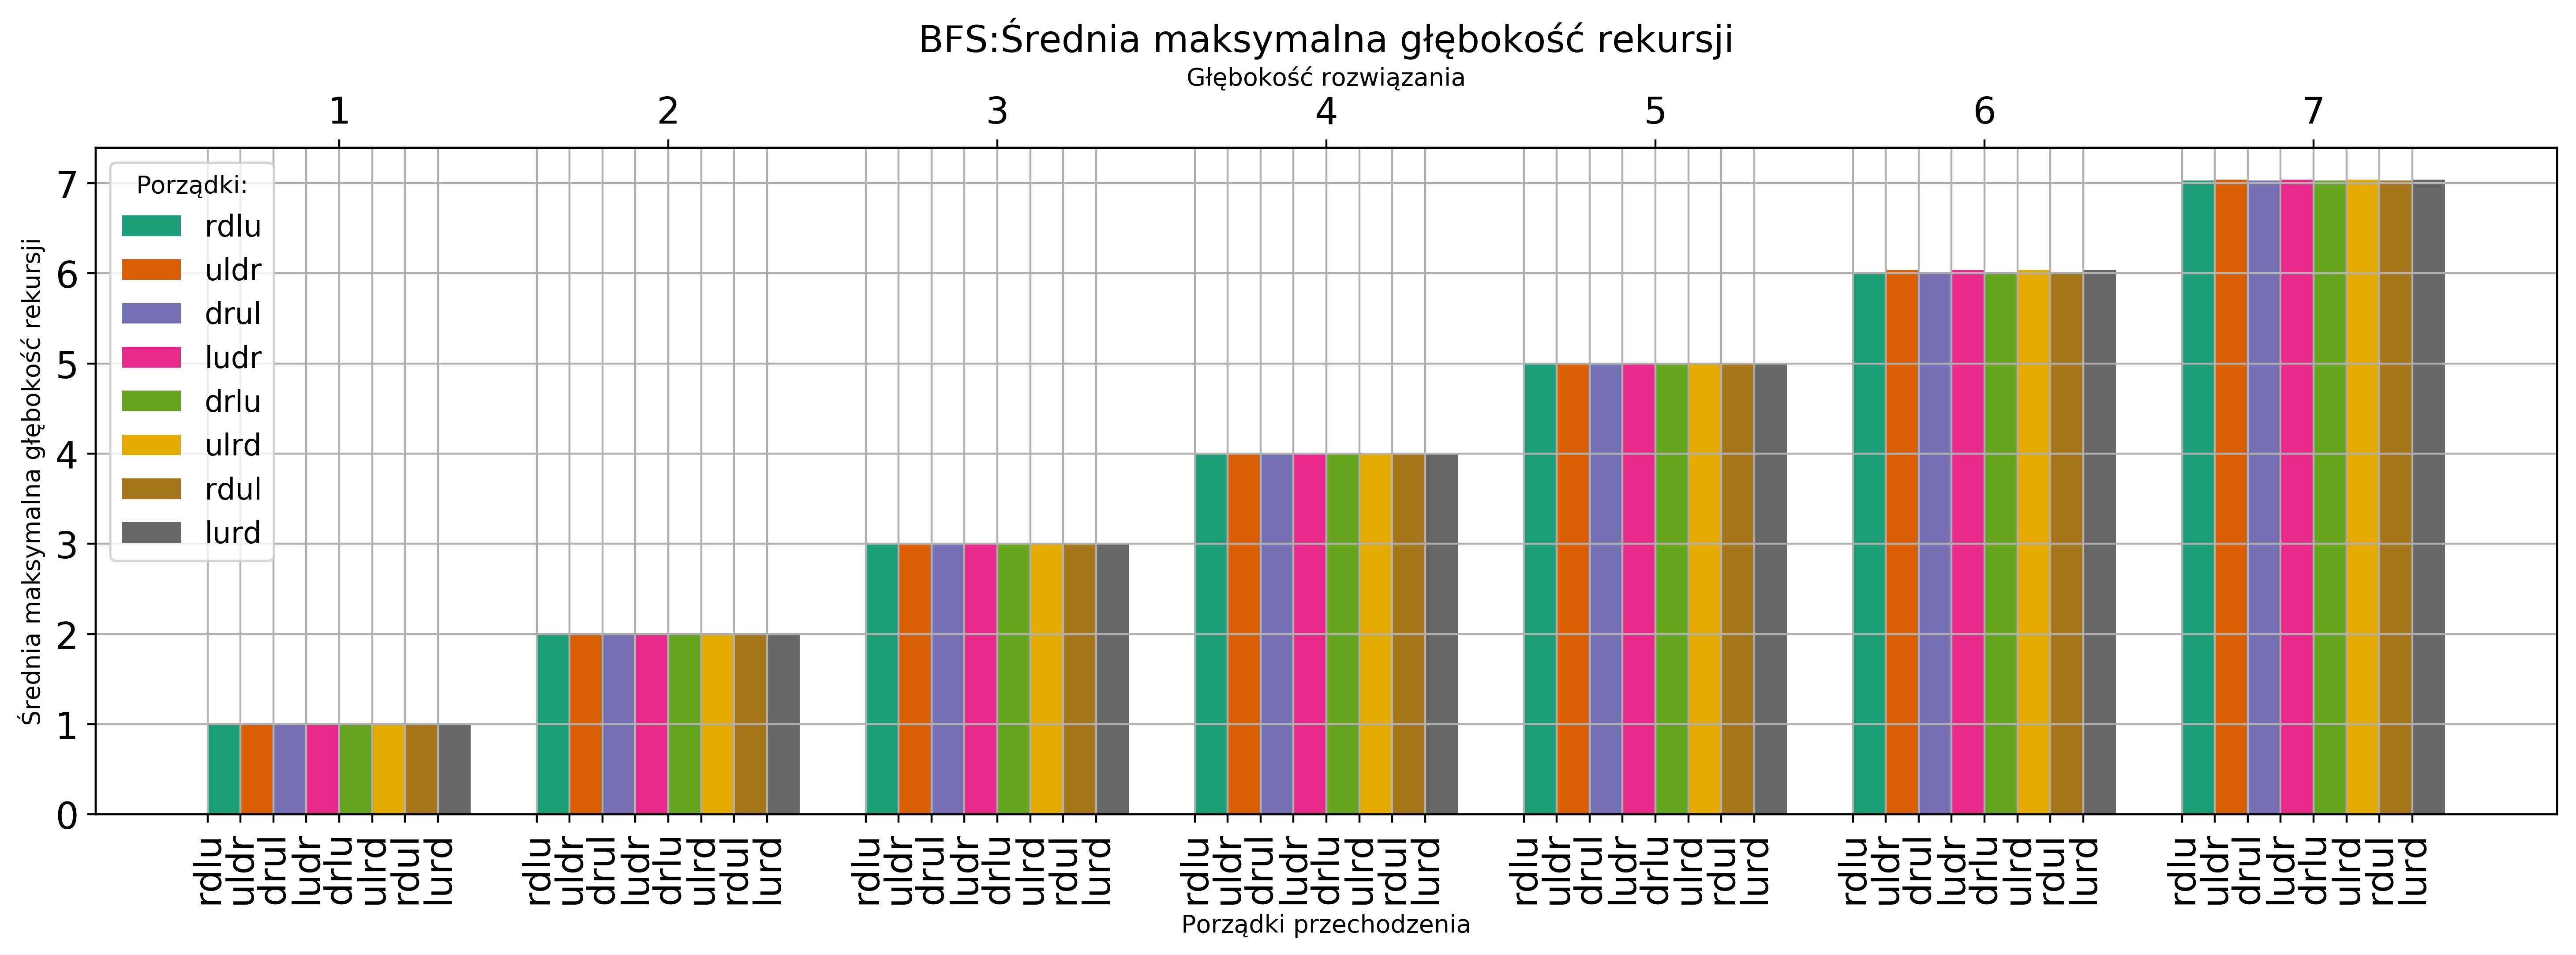

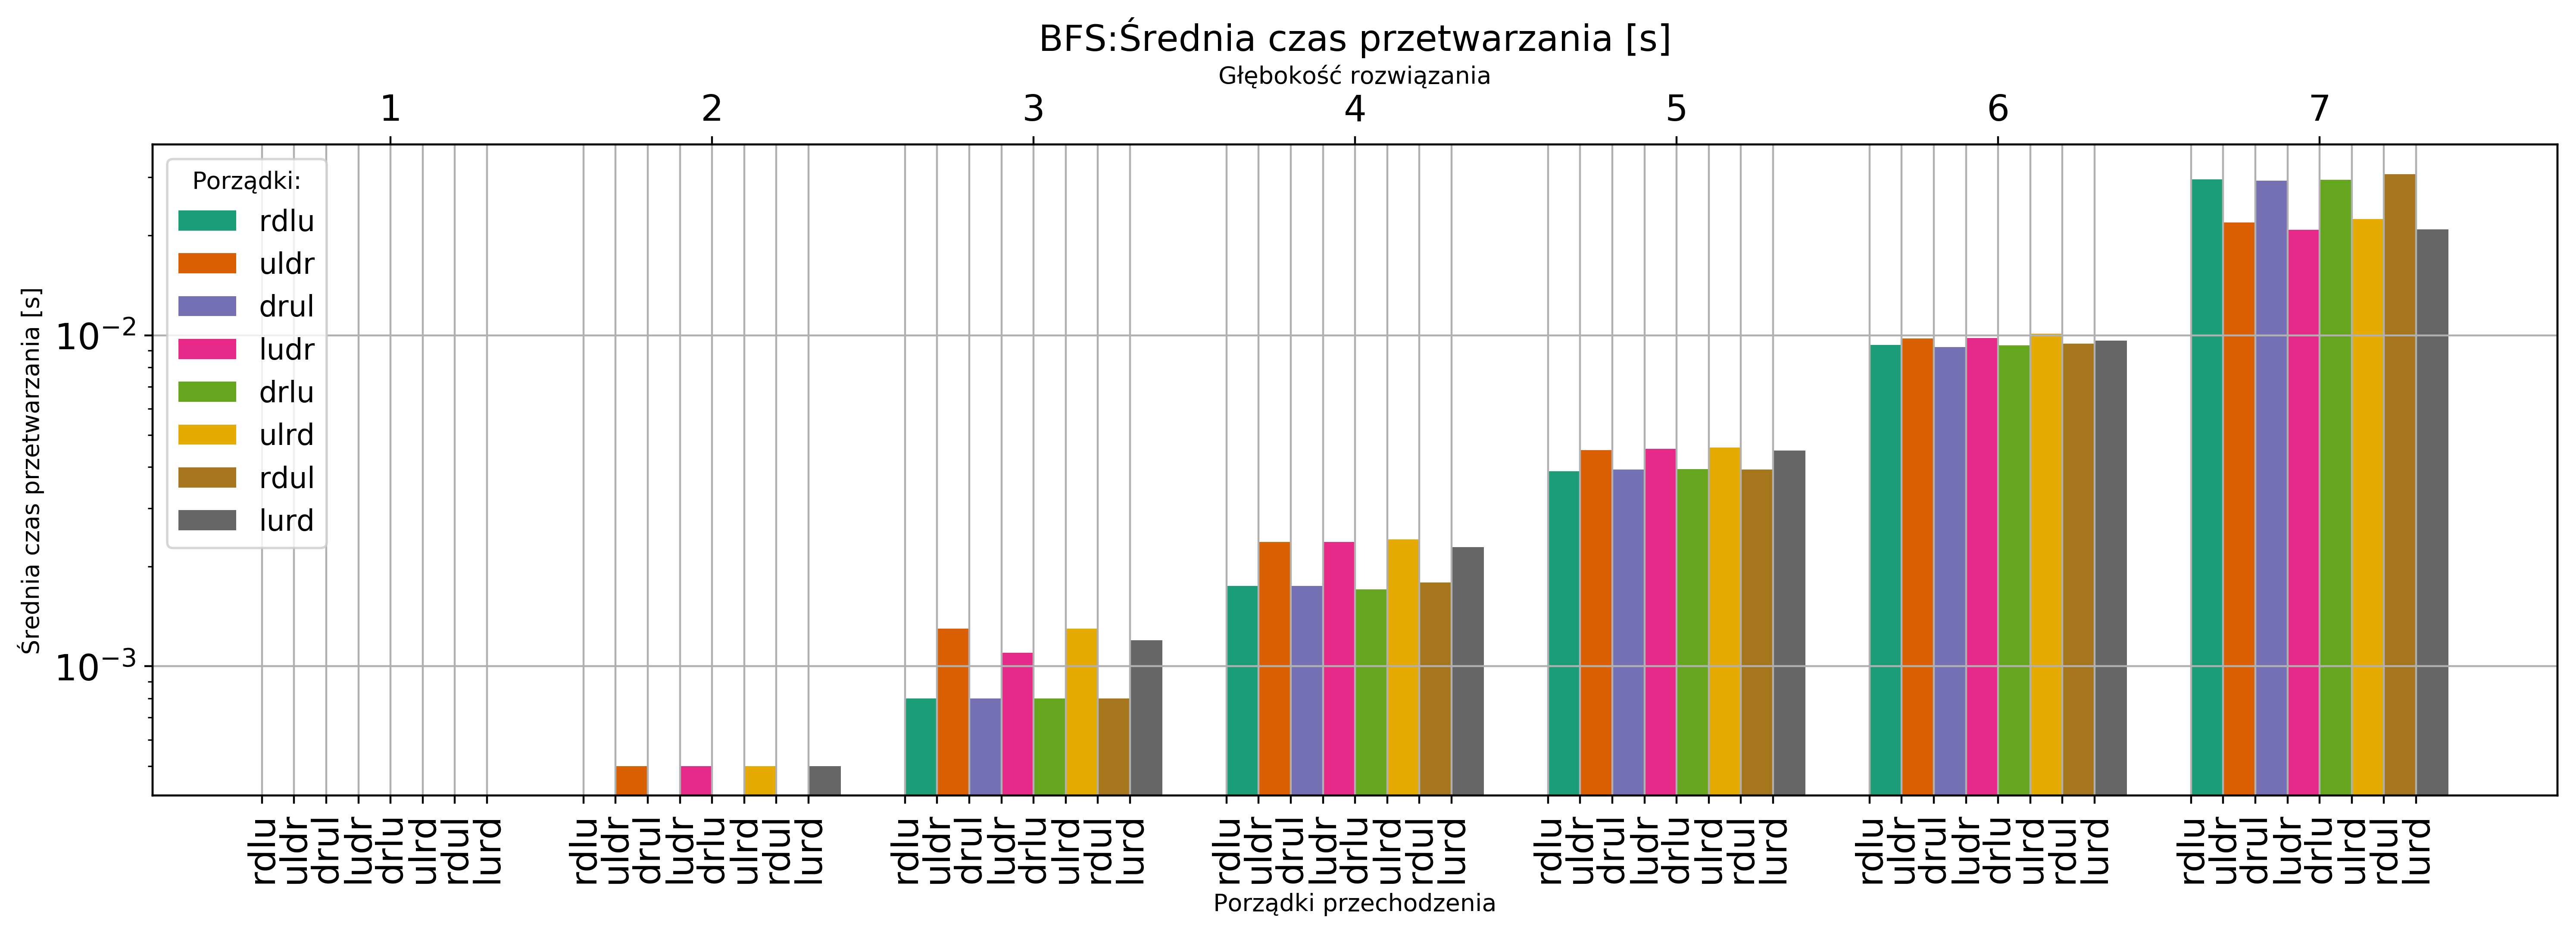

In [81]:
plot_bfs("visited")
plot_bfs("path_length","linear")
plot_bfs("processed")
plot_bfs("recursed","linear")
plot_bfs("time")